<h1><center> Prediction of female labor participation rate <center><h1>

The Human Freedom Index (from now referred to as HFI) measures economic freedoms and civil liberties in the countries participating on the survey. Furthermore, the Women, Business and the Law index (WBL) measures legal discrimination against women in various areas of public life. By using the HFI and WBL indicators in areas such as the rule of law and freedom of expression I will check if there is any correlation with female employment rate.

## Scoping

It is always a good idea to pre-define the project's structure. The goals are stated below. Furthermore,the needed data and the planned analysis, evaluation and final output are briefly discussed.

### Goals

The main goal of this project is to demonstrate an understanding of machine learning techniques using pooled data. This will be achieved by applying such methods to answer the following question:

#### <center> *How does a Human Freedom Index and a WBL score affect female employment rate?* <center> 

### Data

The data used for this project were provided by kaggle:
- hfi data: https://www.kaggle.com/gsutters/the-human-freedom-index
- wbl data: https://www.kaggle.com/mdmuhtasimbillah/female-employment-vs-socioeconimic-factors

and by Our World in Data:
- https://ourworldindata.org/female-labor-supply#labor-force-participation

An overview of the data is provided below:

In [1]:
import pandas as pd
import openpyxl 

In [2]:
hfi = pd.read_csv('hfi_cc_2019.csv')
hfi.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,...,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,...,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54,2,-,-,-,...,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27


The Human Freedom Index places each country on a scale of 0 to 10, where a score of 10 represents the most freedom, for personal freedom and economic freedom. Each country’s human freedom index is an average of the two.

(Source: https://worldpopulationreview.com/country-rankings/freedom-index-by-country)

In [3]:
wbl_all=openpyxl.load_workbook('wbl_50yearpanel_web_27feb2020.xlsx')
wbl=wbl_all['WBL1971-2020']
wbl=pd.DataFrame(wbl.values)

In [4]:
wbl.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,None,,None,None,,None,None,None,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_RightsImmovables,Fam_AM_InheritanceChildren,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,None,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit
1,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Can a woman apply for a passport in the same w...,Can a woman travel outside the country in the ...,...,Do men and women have equal ownership rights t...,Do sons and daughters have equal rights to inh...,Do female and male surviving spouses have equa...,Does the law grant spouses equal administrativ...,Does the law provide for the valuation of nonm...,PENSION,Are the ages at which men and women can retire...,Are the ages at which men and women can retire...,Is the mandatory retirement age for men and wo...,Are periods of absence from work due to childc...
2,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,AFG1972,Afghanistan,AFG,South Asia,Low income,1972,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,AFG1973,Afghanistan,AFG,South Asia,Low income,1973,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No


The wbl index (Women, Business and the Law) awards various economies with a score, depending on the average score for the 8 aspects of public life. The higher the score (out of 100) the more gender equal the laws of the country. The aspects considered are mobility, workplace, pay, marriage, parenthood, pension, entrepreneurship and assets.

In [5]:
df=pd.read_csv('recent-ILO-LFP.csv')
df.head()

,Entity,Code,Year,"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
0,Afghanistan,AFG,1990,15.32
1,Afghanistan,AFG,1991,15.37
2,Afghanistan,AFG,1992,15.40
3,Afghanistan,AFG,1993,15.39
4,Afghanistan,AFG,1994,15.36


This is the labor force participation rate for women, provided by Our World in Data.

### Analysis

The available data are obviously a lot. In order to predict the employment rate, I will use the following supervised learning techniques:
-  Pooled OLS
-  Random Effects model
-  Fixed Effects model

### Evaluation

It will be interesting to see the efficiency of the above mentioned techniques and to decide which one of them is the best. So, I will try to achieve maximum efficiency in each model and then compare them with one another. Metrics like accuracy, precision and F1-score will be used.


- White test for heteroskedasticity
- Breusch- Pagan test for heteroskedasticity
- Durbin-Watson-Test for auto-correlation
- Hausman test

## Import Python Modules

These are some of the libraries that will be used thoughout the project. Note that the pandas and the openpyxl modules was imported at an earlier step. The more specialized libraries will be imported later.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data Inspection

An overview of the data is given above. But taking a closer look is necessary.

### HFI data

The HFI dataframe has 1620 rows and 120 columns. The ones used for the purposes of this project are:
- __year__: the year the index corresponds to 
- __countries__: the country the index refers to
- __region__: the region the country is in
- __hf_score__: the average of personal and economic freedom, from 0 to 10

There are many subcategories measuring economic and personal freedom. Some of them include:
- __pf_rol__: personal freedom rule of law
- __pf_ss_women__: personal freedom safety and security women
- __pf_movement_women__: personal freedom movement women
- __pf_religion__: personal freedom religion
- __pf_identity_sex_female__: personal freedom identity and relationships female
- __pf_identity_divorce__: personal freedom identity and relationships divorce
- __pf_score__: overall score of personal freedom
- __ef_government_transfers__: economic freedom government size transfers
- __ef_legal_gender__: economic freedom legal system concerning gender
- __ef_legal__: economic freedom legal system and property rights
- __ef_money__: economic freedom access to sound money
- __ef_trade__: economic freedom to trade internationally
- __ef_regulation_labor_minwage__: economic freedom labor regulation minimum wage
- __ef_regulation_labor_firing__: economic freedom labor regulation firing
- __ef_regulation_labor_bargain__: economic freedom labor regulation worker bargaining power
- __ef_regulation_labor_hours__: economic freedom labor regulation hours
- __ef_regulation_business_start__: economic freedom business regulation ease of starting a business
- __ef_score__: overall score for economic freedom



The columns that will not be used can be removed

In [75]:
hfi=hfi[['year','countries','region','hf_score','pf_score','ef_score']]

### WBL data

The WBL dataframe has 9502 rows and 50 columns. Those include:
- __Economy__: the economy the inidcator refers to
- __Region__: the region the indicator refers to
- __Income group__: the income group of the country
- __WBL Report Year__: the year the indicator refers to
- __WBL INDEX__: the index for a particular economy ata aprticular year
- __MOBILITY__: the index concerning mobility
- __WORKPLACE__: the index concerning the workplace
- __PAY__: the index concerning pay
- __MARRIAGE__: the index concerning marriage
- __PARENTHOOD__: the index concerning parenthood
- __ENTREPRENEURSHIP__: the index concerning entrepreneurship
- __ASSETS__: the index concerning assets
- __PENSION__: the index concerning pension

Since only those columns will be used, the dataframe needs to be manipulated to become more useful:

In [8]:
wbl=wbl[[1, 3, 4, 5, 6, 7, 12, 17, 22, 28, 34, 39, 45]]
header=wbl.iloc[1]
wbl.columns=header
wbl=wbl.iloc[2: ].reset_index()
wbl.head()

1,index,Economy,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
0,2,Afghanistan,South Asia,Low income,1971,26.3,25,25,0,20,0,75,40,25
1,3,Afghanistan,South Asia,Low income,1972,26.3,25,25,0,20,0,75,40,25
2,4,Afghanistan,South Asia,Low income,1973,26.3,25,25,0,20,0,75,40,25
3,5,Afghanistan,South Asia,Low income,1974,26.3,25,25,0,20,0,75,40,25
4,6,Afghanistan,South Asia,Low income,1975,26.3,25,25,0,20,0,75,40,25


### Labor force participation rate data

The modified dataframe has 7050 rows and 4 columns. For the purposes of ths project I will use the following ones:
- __Entity__: the entity (country/region) the employment rate corresponds to
- __Year__: the year the employment rate was measured
- __Labor force participation rate, female (% of female population ages 15+)__: the female labor participation rate of a specific country at a specific year

In [9]:
df=df.drop('Code', axis=1)

## Data Exploration

As a next step, I will check the data for any trends that may occur.

### HFI data

In [10]:
hfi['hf_score']=pd.to_numeric(hfi['hf_score'], errors = 'coerce')
hfi['pf_score']=pd.to_numeric(hfi['pf_score'], errors = 'coerce')
hfi['ef_score']=pd.to_numeric(hfi['ef_score'], errors = 'coerce')
hfi_temp1=hfi.groupby('year')['hf_score'].mean().reset_index()
hfi_temp2=hfi.groupby('year')['pf_score'].mean().reset_index()
hfi_temp3=hfi.groupby('year')['ef_score'].mean().reset_index()

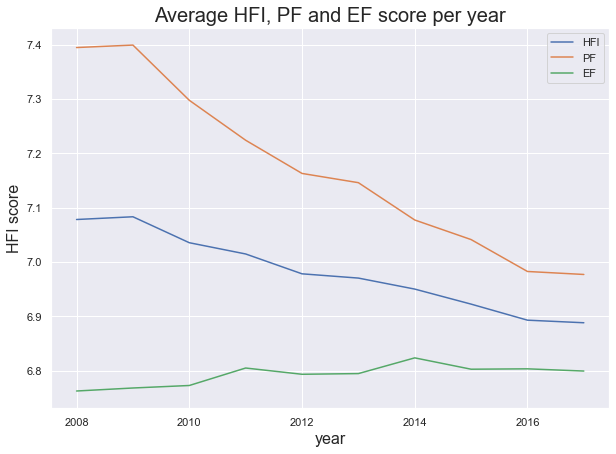

In [11]:
sns.set(style="darkgrid")
sns.color_palette("Set3", 10)
plt.figure(figsize=(10,7))
plt.plot(hfi_temp1.year, hfi_temp1.hf_score, label='HFI')
plt.plot(hfi_temp2.year, hfi_temp2.pf_score, label='PF')
plt.plot(hfi_temp3.year, hfi_temp3.ef_score, label='EF')
plt.title('Average HFI, PF and EF score per year', fontsize=20)
plt.ylabel('HFI score', fontsize=16)
plt.xlabel('year', fontsize=16)
plt.legend()
plt.show()

The HFI world average has been in decline from 2008 to 2017. Same goes for the PF index, which is included in the HFI and it measures personal freedom. On the other hand, the EF (economic freedom) has been slightly increasing.

Let's take a closer look to the average of each region:

In [12]:
hfi_temp4=hfi.groupby(['region', 'year'])['hf_score'].mean().reset_index()
hfi_temp4 = hfi_temp4.sort_values(['hf_score']).reset_index(drop=True)

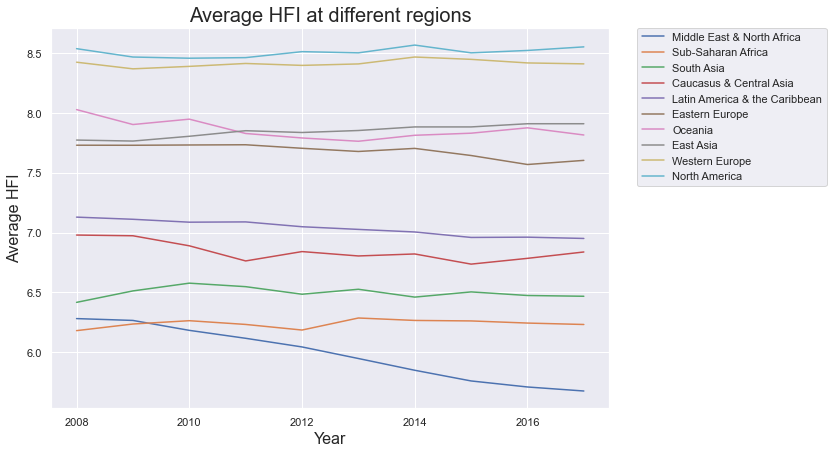

In [13]:
plt.figure(figsize=(10,7))
sns.lineplot(
    x="year", 
    y="hf_score", 
    data=hfi_temp4, hue='region')
plt.title('Average HFI at different regions', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average HFI', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Seems like the lowest HFI scores occur in Middle East and North Africa, while the largest HFI in North America. 

### WBL data

In [14]:
cols = ['MOBILITY', 'WORKPLACE', 'PAY','MARRIAGE','PARENTHOOD','ENTREPRENEURSHIP','ASSETS','PENSION']
wbl[cols] = wbl[cols].apply(pd.to_numeric, errors='coerce')

wbl_mobility=wbl.groupby('WBL Report Year')['MOBILITY'].mean().reset_index()
wbl_mobility = wbl_mobility.sort_values(['MOBILITY']).reset_index(drop=True)
wbl_workplace=wbl.groupby('WBL Report Year')['WORKPLACE'].mean().reset_index()
wbl_workplace = wbl_workplace.sort_values(['WORKPLACE']).reset_index(drop=True)
wbl_pay=wbl.groupby('WBL Report Year')['PAY'].mean().reset_index()
wbl_pay = wbl_pay.sort_values(['PAY']).reset_index(drop=True)
wbl_marriage=wbl.groupby('WBL Report Year')['MARRIAGE'].mean().reset_index()
wbl_marriage = wbl_marriage.sort_values(['MARRIAGE']).reset_index(drop=True)
wbl_parenthood=wbl.groupby('WBL Report Year')['PARENTHOOD'].mean().reset_index()
wbl_parenthood = wbl_parenthood.sort_values(['PARENTHOOD']).reset_index(drop=True)
wbl_entrepreneurship=wbl.groupby('WBL Report Year')['ENTREPRENEURSHIP'].mean().reset_index()
wbl_entrepreneurship = wbl_entrepreneurship.sort_values(['ENTREPRENEURSHIP']).reset_index(drop=True)
wbl_assets=wbl.groupby('WBL Report Year')['ASSETS'].mean().reset_index()
wbl_assets = wbl_assets.sort_values(['ASSETS']).reset_index(drop=True)
wbl_pension=wbl.groupby('WBL Report Year')['PENSION'].mean().reset_index()
wbl_pension = wbl_pension.sort_values(['PENSION']).reset_index(drop=True)

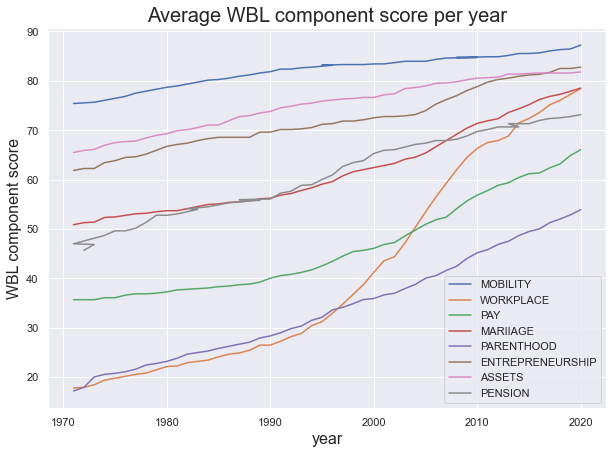

In [15]:
plt.figure(figsize=(10,7))
plt.plot(wbl_mobility['WBL Report Year'], wbl_mobility.MOBILITY, label='MOBILITY')
plt.plot(wbl_workplace['WBL Report Year'], wbl_workplace.WORKPLACE, label='WORKPLACE')
plt.plot(wbl_pay['WBL Report Year'], wbl_pay.PAY, label='PAY')
plt.plot(wbl_marriage['WBL Report Year'], wbl_marriage.MARRIAGE, label='MARIIAGE')
plt.plot(wbl_parenthood['WBL Report Year'], wbl_parenthood.PARENTHOOD, label='PARENTHOOD')
plt.plot(wbl_entrepreneurship['WBL Report Year'], wbl_entrepreneurship.ENTREPRENEURSHIP, label='ENTREPRENEURSHIP')
plt.plot(wbl_assets['WBL Report Year'], wbl_assets.ASSETS, label='ASSETS')
plt.plot(wbl_pension['WBL Report Year'], wbl_pension.PENSION, label='PENSION')
plt.title('Average WBL component score per year', fontsize=20)
plt.ylabel('WBL component score', fontsize=16)
plt.xlabel('year', fontsize=16)
plt.legend()
plt.show()

It seems that the average value of each WBL component has been increasing in the past 50 years. Let's take a closer look to each of those indicators. The sort descriptions of each indicator are provided directly from the wbl website: https://wbl.worldbank.org/en/wbl

#### Mobility

This indicator examines restrictions in women's freedom of movement and awards each economy a score out of 100, with 100 indicating zero restrictions.

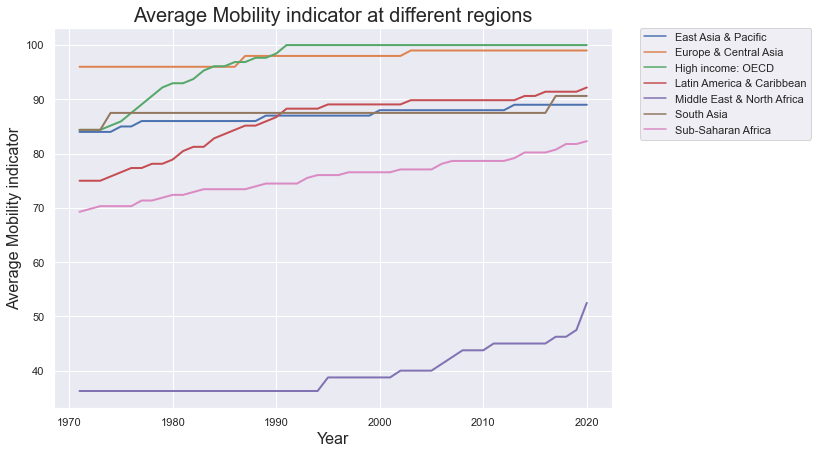

In [16]:
wbl_mobility_region=wbl.groupby(['Region', 'WBL Report Year'])['MOBILITY'].mean().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(
    x="WBL Report Year", 
    y="MOBILITY", 
    data=wbl_mobility_region, hue='Region', linewidth=2)
plt.title('Average Mobility indicator at different regions', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Mobility indicator', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the most recent year Middle East and North Africa had the lowest average score, while the OECD countries had the highest. In South Asia, East Asia & Pacific, Europe & Central Asia progress has been very slow or non-existant for long periods of time.

#### Workplace

This indicator analyzes laws affecting women's decisions to enter and remain in the labor force, as well as protections against discrimination and sexual harassment in the workplace.

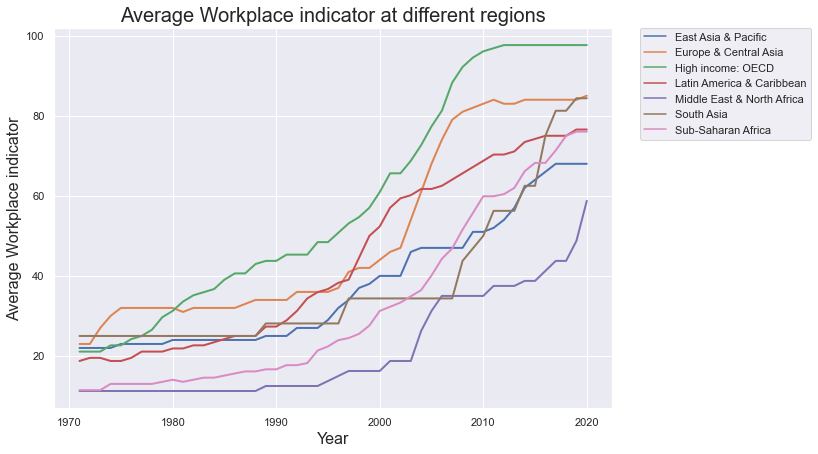

In [17]:
wbl_workplace_region=wbl.groupby(['Region', 'WBL Report Year'])['WORKPLACE'].mean().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(
    x="WBL Report Year", 
    y="WORKPLACE", 
    data=wbl_workplace_region, hue='Region', linewidth=2)
plt.title('Average Workplace indicator at different regions', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Workplace indicator', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

All regions showcase an upward trend. In the most recent year, Middle East and North Africa had the lowest average score, while the OECD countries had the highest.

#### Pay

This indicator measures laws and regulations affecting occupational segregation and the gender wage gap.

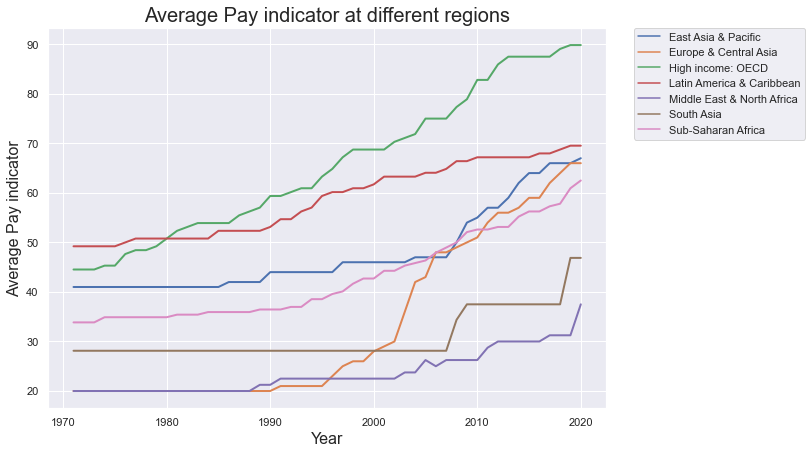

In [18]:
wbl_pay_region=wbl.groupby(['Region', 'WBL Report Year'])['PAY'].mean().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(
    x="WBL Report Year", 
    y="PAY", 
    data=wbl_pay_region, hue='Region', linewidth=2)
plt.title('Average Pay indicator at different regions', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Pay indicator', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

All regions showcase an upward trend. In the most recent year, Middle East and North Africa had the lowest average score, while the OECD countries had the highest. Middle East & North Africa, South Asia, Europe & Central Asia and East Asia & Pacific had no progress for a long time and then their average score increased at an impressive rate.

#### Marriage

This indicator assesses legal constraints related to marriage and divorce.

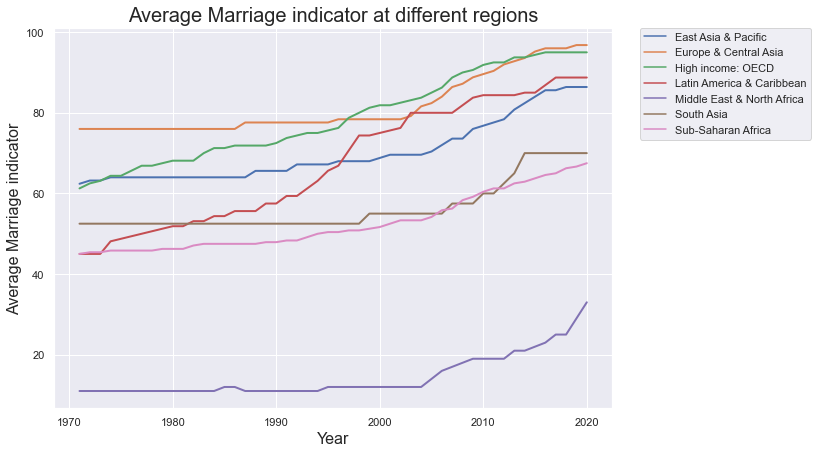

In [19]:
wbl_marriage_region=wbl.groupby(['Region', 'WBL Report Year'])['MARRIAGE'].mean().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(
    x="WBL Report Year", 
    y="MARRIAGE", 
    data=wbl_marriage_region, hue='Region', linewidth=2)
plt.title('Average Marriage indicator at different regions', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Marriage indicator', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

All regions showcase an upward trend. In the most recent year, Middle East and North Africa had the lowest average score, while Europe and East Asia had the highest. The OECD countries and Latin America & Carribean progress with a higher rate compared to the rest of the regions.

#### Parenthood

This indocator examines laws affecting women’s work after having children.

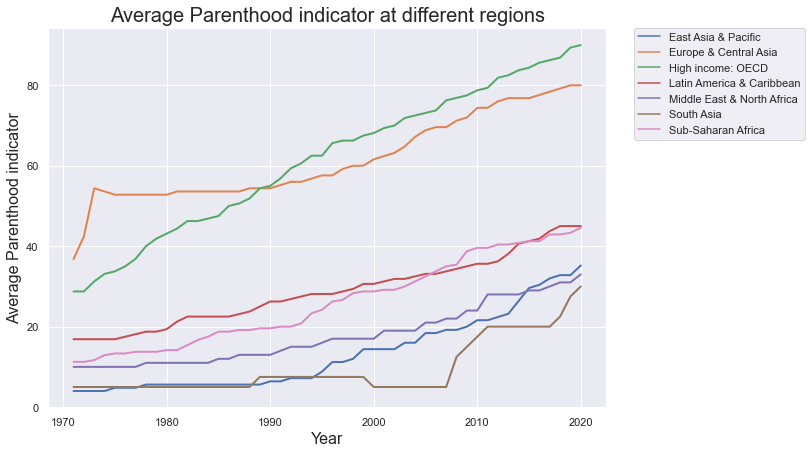

In [20]:
wbl_parenthood_region=wbl.groupby(['Region', 'WBL Report Year'])['PARENTHOOD'].mean().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(
    x="WBL Report Year", 
    y="PARENTHOOD", 
    data=wbl_parenthood_region, hue='Region', linewidth=2)
plt.title('Average Parenthood indicator at different regions', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Parenthood indicator', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

All regions showcase an upward trend. In the most recent year, South Asia had the lowest average score, while the OECD countries had the highest. The OECD countries and Europe & Central Asia progress with a higher rate compared to the rest of the regions.

#### Entrepreneurship

This indicator examines constraints to women's ability to start and run a business.

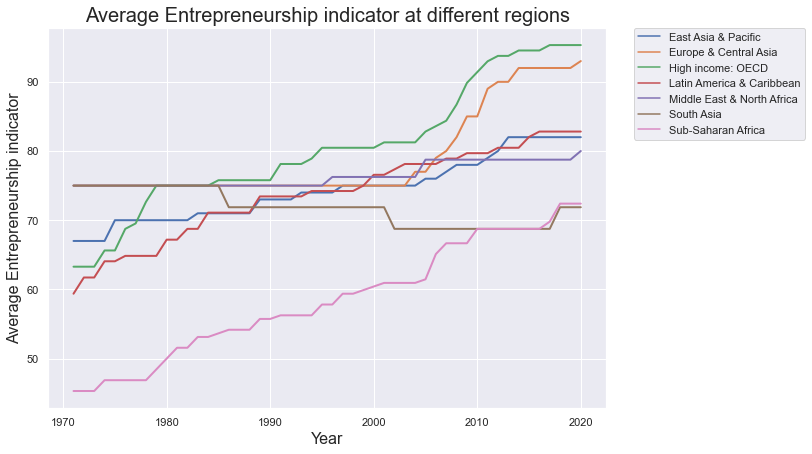

In [21]:
wbl_entrepreneurship_region=wbl.groupby(['Region', 'WBL Report Year'])['ENTREPRENEURSHIP'].mean().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(
    x="WBL Report Year", 
    y="ENTREPRENEURSHIP", 
    data=wbl_entrepreneurship_region, hue='Region', linewidth=2)
plt.title('Average Entrepreneurship indicator at different regions', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Entrepreneurship indicator', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the most recent year South Asia had the lowest average score, while the OECD countries had the highest. South Asia seems to be the only region where the average score progressed downwards from the mid-80s to the late 2010s, but it picked up again recently.

#### Assets

This indicator analyzes gender differences in property and inheritance law.

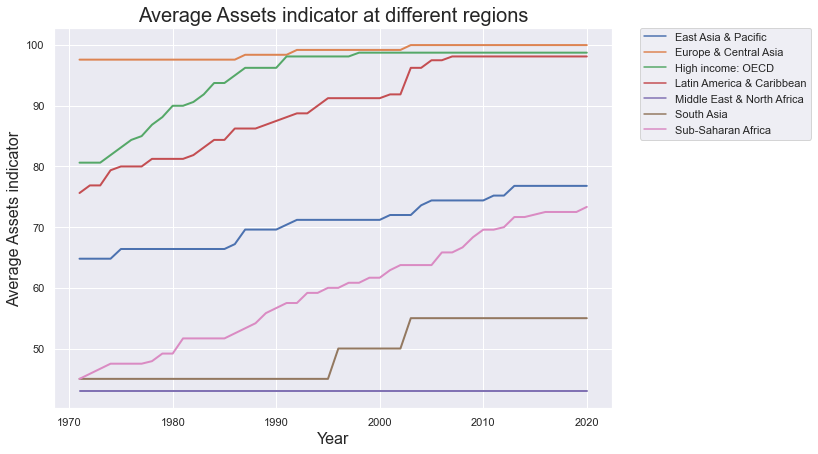

In [22]:
wbl_assets_region=wbl.groupby(['Region', 'WBL Report Year'])['ASSETS'].mean().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(
    x="WBL Report Year", 
    y="ASSETS", 
    data=wbl_assets_region, hue='Region', linewidth=2)
plt.title('Average Assets indicator at different regions', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Assets indicator', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the most recent year Europe & Central Asia had the highest average score, while Middle East & North Africa had the lowest. In fact, Middle East & North Africa did not progressed at all. The rest of the regions showcase an upward trend with various rates.

#### Pension

This indicator assesses laws affecting the size of a woman's pension.

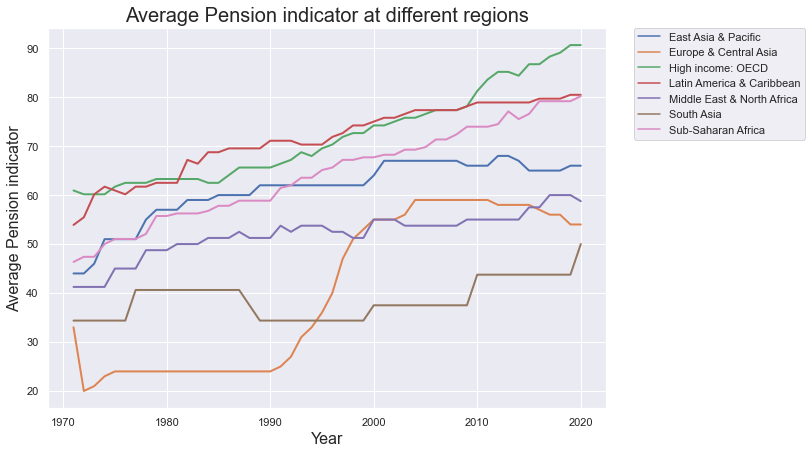

In [23]:
wbl_pension_region=wbl.groupby(['Region', 'WBL Report Year'])['PENSION'].mean().reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(
    x="WBL Report Year", 
    y="PENSION", 
    data=wbl_pension_region, hue='Region', linewidth=2)
plt.title('Average Pension indicator at different regions', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Pension indicator', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the most recent year South Asia had the lowest average score, while the OECD countries had the highest. All regions  seem to have fluctuated at varying rates throughout the years.

### Labor force participation data

First let's check the average female labor force participation rate throughout the years:

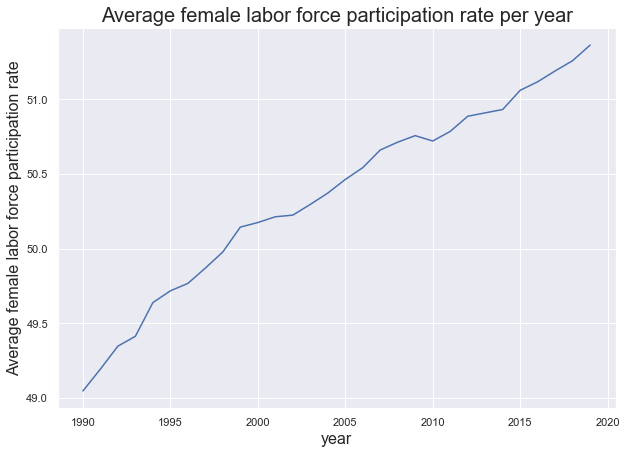

In [24]:
df_temp1=df.groupby('Year')['Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)'].mean().reset_index()

plt.figure(figsize=(10,7))
plt.plot(df_temp1.Year, df_temp1['Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)'])
plt.title('Average female labor force participation rate per year', fontsize=20)
plt.ylabel('Average female labor force participation rate', fontsize=16)
plt.xlabel('year', fontsize=16)
plt.show()

The average female labor participation rate has been increasing throughout the years. Let's see what has been happening in different regions of the world:

In [25]:
df['region']= 'region'

for entity in df['Entity'].tolist():
    if (entity in hfi[hfi['region']=='Middle East & North Africa']['countries'].tolist())== True:
        df.loc[df['Entity']== entity, 'region'] =  'Middle East & North Africa'
    elif (entity in hfi[hfi['region']=='Eastern Europe']['countries'].tolist())==True:
        df.loc[df['Entity']== entity, 'region']='Eastern Europe'
    elif (entity in hfi[hfi['region']=='Sub-Saharan Africa']['countries'].tolist())==True:
        df.loc[df['Entity']== entity, 'region']='Sub-Saharan Africa'
    elif (entity in hfi[hfi['region']=='Latin America & the Caribbean']['countries'].tolist())==True:
        df.loc[df['Entity']== entity, 'region']='Latin America & the Caribbean'
    elif (entity in hfi[hfi['region']=='Caucasus & Central Asia']['countries'].tolist())==True:
        df.loc[df['Entity']== entity, 'region']='Caucasus & Central Asia'
    elif (entity in hfi[hfi['region']=='Oceania']['countries'].tolist())==True:
        df.loc[df['Entity']== entity, 'region']= 'Oceania'
    elif (entity in hfi[hfi['region']=='Western Europe']['countries'].tolist())==True:
        df.loc[df['Entity']== entity, 'region']='Western Europe'
    elif (entity in hfi[hfi['region']=='South Asia']['countries'].tolist())==True:
        df.loc[df['Entity']== entity, 'region']='South Asia'
    elif (entity in hfi[hfi['region']=='North America']['countries'].tolist())==True:
        df.loc[df['Entity']== entity, 'region']='North America'
    elif (entity in hfi[hfi['region']=='East Asia']['countries'].tolist())==True:
        df.loc[df['Entity']== entity, 'region']='East Asia'
    else:
        df.loc[df['Entity']== entity, 'region']='Other'

In [26]:
df_temp2=df.groupby(['region', 'Year'])['Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)'].mean().reset_index()
df_temp2 = df_temp2.sort_values(['Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)']).reset_index(drop=True)

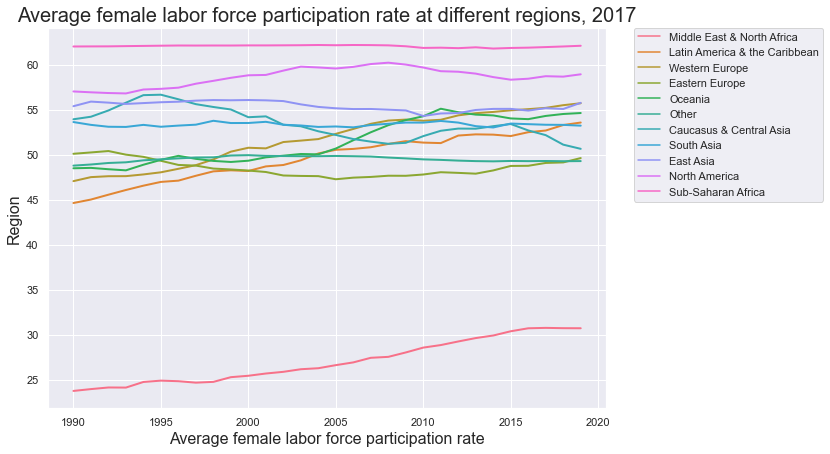

In [27]:
plt.figure(figsize=(10,7))
sns.lineplot(
    x="Year", 
    y="Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)",
    hue='region',
    data=df_temp2, linewidth=2)
plt.title('Average female labor force participation rate at different regions, 2017', fontsize=20)
plt.ylabel('Region', fontsize=16)
plt.xlabel('Average female labor force participation rate', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In 2017, the lowest average female participation rate was in Middle East & Northern Africa and the highest was in Sub-Saharan Africa. Some regions (e.g. Sub-Saharan Africa) mantained a stable participation rate, while others (e.g. Middle East & North Africa) progressed at a relatively stable rate. Most of the remaining regions fluctuated throughout the years.

## Preprocess data

#### Merging the dataframes

First off all, the only countries that will be considered are the ones for which employment rate data are available. Furthermore, the HFI dataframe only covers the time period 2008-2017, so nothing before or after that can be considered.

In [28]:
#save the countries and the years
countries=df.Entity.unique()
years=hfi.year.unique()

#drop columns that will not be used
wbl=wbl[]

In [29]:
#rename some columns
wbl=wbl.rename(columns={'WBL Report Year':'year', 'Economy':'countries', 'WBL INDEX':'wbl'})
df=df.rename(columns={'Year':'year', 'Entity':'countries', 'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)':'pr'})

In [30]:
#only keep the available countries and years
hfi1=hfi.loc[hfi['countries'].isin(countries)]
wbl1=wbl.loc[wbl['countries'].isin(countries)]
df1=df.loc[df['year'].isin(years)]
wbl1=wbl1.loc[wbl1['year'].isin(years)]

In [95]:
data=pd.merge(hfi1, wbl1, 'inner')
data = pd.merge(data, df1, 'inner')

#only keep the columns that will be used
data = data[['year','countries', 'hf_score','wbl', 'pr']]
data.head()

,year,countries,hf_score,wbl,pr
0,2017,Albania,7.84,91.3,47.58
1,2017,Algeria,4.99,57.5,17.56
2,2017,Angola,5.40,70,76.13
3,2017,Argentina,6.86,73.1,49.37
4,2017,Armenia,7.42,80,46.89


#### Missing values

Many algorithms do not handle missing values well. That is why it is important to be aware of any NaNs in the data and drop them. Specifically, I am going to create a new data frame that does not have any missing values and only consists of the columns I intend to use to predict religion.

In [96]:
data.isnull().sum()

year          0
countries     0
hf_score     59
wbl           0
pr            0
dtype: int64

There are only 59 missing values that are going to be removed.

In [97]:
#dropping NaNs
data=data.dropna()
data.shape

(1311, 5)

So all in all, there are 1,311 values and 4 variables. The data are not as many, which is important to keep in mind as I proceed.

#### Numerical Values

In this step, all numerical values are turned into floats. Up until now they were stored as 'object' data types.

In [98]:
data.dtypes

year          object
countries     object
hf_score     float64
wbl           object
pr           float64
dtype: object

In [99]:
data['wbl']=pd.to_numeric(data['wbl'])

## Model

Now it is time to build the model. I follow the method from here: https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8

First, I will build a pooled OLS regression:

In [100]:
year = pd.Categorical(data.year)
data = data.set_index(["countries", "year"])
data["year"] = year

In [101]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm

exog = sm.tools.tools.add_constant(data[['hf_score','wbl']])
endog = data['pr']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                     pr   R-squared:                        0.0737
Estimator:                  PooledOLS   R-squared (Between):              0.0870
No. Observations:                1311   R-squared (Within):              -0.3100
Date:                Mon, Oct 25 2021   R-squared (Overall):              0.0737
Time:                        10:53:42   Log-likelihood                   -5308.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      52.009
Entities:                         137   P-value                           0.0000
Avg Obs:                       9.5693   Distribution:                  F(2,1308)
Min Obs:                       2.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             4.9000
                            

According to that model, HFI is only significant at a 10% level. At this point it is important to check for heteroskedasticity.

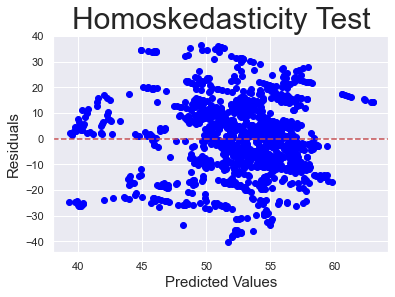

In [102]:
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = "blue")
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

The residuals are pretty spread out, so the homoskedasticity condition must be violated. To be sure, I will also check with a White and a Breusch-Pagan test.

In [103]:
#White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([data, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(data['pr']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

{'LM-Stat': 1098.6229023354786, 'LM p-val': 2.7356964797363856e-239, 'F-Stat': 3383.1302246270006, 'F p-val': 0.0}


In [104]:
#Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 5.053079687080462, 'LM p-val': 0.02458220859137112, 'F-Stat': 5.064892919846617, 'F p-val': 0.02458065151919443}


Both tests give a very small p-value, which means there is heteroskedasticity. At this point I will also check for autocorrelation with a Durbin-Watson-Test:

In [105]:
# Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print("Durbin Watson test result: " + str(durbin_watson_test_results))

Durbin Watson test result: 2.0449195782602803


The result indicates negative autocorrelation. Therefore a random effects (RE) or a fixed effects (FE) model would be more appropriate.

In [106]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects

exog = sm.tools.tools.add_constant(data[['hf_score','wbl']])
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                     pr   R-squared:                        0.0261
Estimator:              RandomEffects   R-squared (Between):              0.0451
No. Observations:                1311   R-squared (Within):               0.0230
Date:                Mon, Oct 25 2021   R-squared (Overall):              0.0353
Time:                        10:54:00   Log-likelihood                   -2469.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.549
Entities:                         137   P-value                           0.0000
Avg Obs:                       9.5693   Distribution:                  F(2,1308)
Min Obs:                       2.0000                                           
Max Obs:                      10.0000   F-statistic (robust):             17.065
                            

Both models produce very similar results, so a Hausman test will be used to decide between the two. 

In [107]:
import numpy.linalg as la
from scipy import stats

def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval
hausman_results = hausman(fe_res, re_res) 
print("chi squared: " + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi squared: 9.71260316207415
degrees of freedom: 3
p-Value: 0.021173935527107716


The null hypothesis cannot be rejected. Thus, the RE model is preferred. 

## Evaluation

Even though the RE model is preferred, the HFI score seems to be insignificant. Further exploration is definitely needed. Omitted variables like the GDP for example could be pivotal in explaining the differences observed between countries. 